# **DataCamp.Course_041_Introduction to Statistics in Python**

### **Course Description**

Course Description

Statistics is the study of how to collect, analyze, and draw conclusions from data. It’s a hugely valuable tool that you can use to bring the future into focus and infer the answer to tons of questions. For example, what is the likelihood of someone purchasing your product, how many calls will your support team receive, and how many jeans sizes should you manufacture to fit 95% of the population? In this course, you'll discover how to answer questions like these as you grow your statistical skills and learn how to calculate averages, use scatterplots to show the relationship between numeric values, and calculate correlation. You'll also tackle probability, the backbone of statistical reasoning, and learn how to use Python to conduct a well-designed study to draw your own conclusions from data.

## **Summary Statistics (Module 01-041)**

#### **What is statistics?**

*The field of statistics* - the practice and study of collecting and analyzing data
*A summary statistic* - a fact about or summary of some data

*What can statistics do?*

- How likely is someone to purchase a product? Are people more likely to purchase it if they can use a di(erent payment system?
- How many occupants will your hotel have? How can you optimize occupancy?
- How many sizes of jeans need to be manufactured so they can ,t 95% of the population?
- Should the same number of each size be produced?
- A/B tests: Which ad is more e(ective in getting people to purchase a product?

*Types of statistics*

1. Descriptive statistics: Describe and summarize data
2. Inferential statistics: Use a sample of data to make inferences about a larger population

*Types of data*

1. Numeric (Quantitative)
1.1. Continuous (Measured)
1.2. Discrete (Counted)
2. Categorical (Qualitative)
2.1. Nominal (Unordered)
2.2. Ordinal (Ordered)

#### **Measures of center**

1. Mean 
`import numpy as np`
`np.mean(msleep['sleep_total'])`

2. Median
`np.median(msleep['sleep_total'])`

3. Mode
`import statistics`
`statistics.mode(msleep['vore'])`

Adding an outlier

`msleep[msleep['vore'] == 'insecti']`
`msleep[msleep['vore'] == "insecti"]['sleep_total'].agg([np.mean, np.median])`

**Mean and median**

In this chapter, you'll be working with the [2018 Food Carbon Footprint Index from nu3](https://www.nu3.de/blogs/nutrition/food-carbon-footprint-index-2018). The `food_consumption` dataset contains information about the kilograms of food consumed per person per year in each country in each food category (`consumption`) as well as information about the carbon footprint of that food category (`co2_emissions`) measured in kilograms of carbon dioxide, or CO2, per person per year in each country.

In this exercise, you'll compute measures of center to compare food consumption in the US and Belgium using your `pandas` and `numpy` skills.

`pandas` is imported as `pd` for you and `food_consumption` is pre-loaded.

STEP 01
    Import numpy with the alias np.
    Create two DataFrames: one that holds the rows of food_consumption for 'Belgium' and another that holds rows for 'USA'. Call these be_consumption and usa_consumption.
    Calculate the mean and median of kilograms of food consumed per person per year for both countries.

In [2]:
# Import pandas with alias pd
import pandas as pd

#Load Data
food_consumption = pd.read_csv('datasets/food_consumption.csv')

# Import numpy with alias np
import numpy as np

# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

42.13272727272727
12.59
44.650000000000006
14.58


STEP 02
    Subset food_consumption for rows with data about Belgium and the USA.
    Group the subsetted data by country and select only the consumption column.
    Calculate the mean and median of the kilograms of food consumed per person per year in each country using .agg().

In [3]:
# Import numpy as np
import numpy as np

# Subset for Belgium and USA only
be_and_usa_list = ['Belgium','USA']
be_and_usa = food_consumption[food_consumption['country'].isin(be_and_usa_list)]
#df[df['Country Name'].isin(country_list)]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


**Mean vs. median**

In the video, you learned that the mean is the sum of all the data points divided by the total number of data points, and the median is the middle value of the dataset where 50% of the data is less than the median, and 50% of the data is greater than the median. In this exercise, you'll compare these two measures of center.

`pandas` is loaded as `pd`, `numpy` is loaded as `np`, and `food_consumption` is available.

STEP 01
    Import matplotlib.pyplot with the alias plt.
    Subset food_consumption to get the rows where food_category is 'rice'.
    Create a histogram of co2_emission for rice and show the plot.

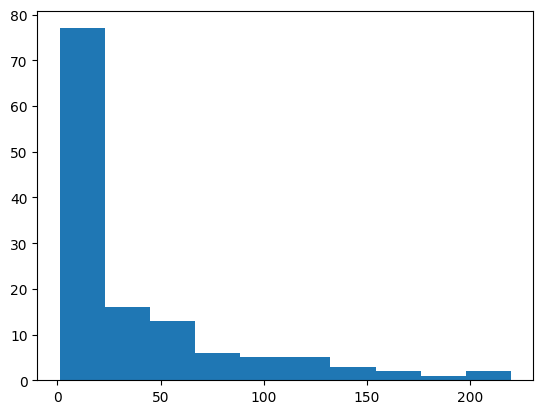

In [4]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption['co2_emission'])
plt.show()

STEP02
Question

Take a look at the histogram you just created of different countries' CO2 emissions for rice. Which of the following terms best describes the shape of the data?

*Possible Answer: Right-skewed*

STEP03
Use .agg() to calculate the mean and median of co2_emission for rice.

In [5]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg([np.mean, np.median]))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


Question

Given the skew of this data, what measure of central tendency best summarizes the kilograms of CO2 emissions per person per year for rice?

*Possible Answer: median*

#### **Measures of spread**

1. Variance: Average distance from each data point to the data's mean. Use np.var()

`np.var(msleep['sleep_total'], ddof=1)`

Without ddof=1 , population variance is
calculated instead of sample variance:

`np.var(msleep['sleep_total'])`

2. Standard deviation

`np.std(msleep['sleep_total'], ddof=1)`

3. Mean absolute deviation

`dists = msleep['sleep_total'] - mean(msleep$sleep_total)`
`np.mean(np.abs(dists))`

Standard deviation vs. mean absolute deviation
Standard deviation squares distances, penalizing longer distances more than shorter ones.
Mean absolute deviation penalizes each distance equally.
One isn't better than the other, but SD is more common than MAD.

4. Quantiles

0.5 quantile = median
`np.quantile(msleep['sleep_total'], 0.5)`

Quartiles: 
`np.quantile(msleep['sleep_total'], [0, 0.25, 0.5, 0.75, 1])`

5. Boxplots use quartiles

`import matplotlib.pyplot as plt`
`plt.boxplot(msleep['sleep_total'])`
`plt.show()`

6. Quantiles using np.linspace()

`np.quantile(msleep['sleep_total'], [0, 0.2, 0.4, 0.6, 0.8, 1])`
array([ 1.9 , 6.24, 9.48, 11.14, 14.4 , 19.9 ])

`np.linspace(start, stop, num)`

`np.quantile(msleep['sleep_total'], np.linspace(0, 1, 5))`
array([ 1.9 , 7.85, 10.1 , 13.75, 19.9 ])

7. Interquartile range (IQR): Height of the box in a boxplot

`np.quantile(msleep['sleep_total'], 0.75) - np.quantile(msleep['sleep_total'], 0.25)`

`from scipy.stats import iqr`
`iqr(msleep['sleep_total'])`

8. Outliers: data point that is substantially different from the others

How do we know what a substantial di(erence is? A data point is an outlier if:

data < Q1 − 1.5 × IQR or
data > Q3 + 1.5 × IQR

Finding outliers:

`from scipy.stats import iqr`
`iqr = iqr(msleep['bodywt'])`
`lower_threshold = np.quantile(msleep['bodywt'], 0.25) - 1.5 * iqr`
`upper_threshold = np.quantile(msleep['bodywt'], 0.75) + 1.5 * iqr`
`msleep[(msleep['bodywt'] < lower_threshold) | (msleep['bodywt'] > upper_threshold)]`

9. **All in one go**

`msleep['bodywt'].describe()`


**Quartiles, quantiles, and quintiles**

Quantiles are a great way of summarizing numerical data since they can be used to measure center and spread, as well as to get a sense of where a data point stands in relation to the rest of the data set. For example, you might want to give a discount to the 10% most active users on a website.

In this exercise, you'll calculate quartiles, quintiles, and deciles, which split up a dataset into 4, 5, and 10 pieces, respectively.

Both `pandas` as `pd` and `numpy` as `np` are loaded and `food_consumption` is available.

STEP01

Calculate the quartiles of the co2_emission column of food_consumption

In [6]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))

[   0.        5.21     16.53     62.5975 1712.    ]


STEP 02

Calculate the six quantiles that split up the data into 5 pieces (quintiles) of the co2_emission column of food_consumption.

In [7]:
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.2, 0.4, 0.6, 0.8, 1]))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


STEP 03

Calculate the eleven quantiles of co2_emission that split up the data into ten pieces (deciles).

In [8]:
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 11)))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


**Variance and standard deviation**

Variance and standard deviation are two of the most common ways to measure the spread of a variable, and you'll practice calculating these in this exercise. Spread is important since it can help inform expectations. For example, if a salesperson sells a mean of 20 products a day, but has a standard deviation of 10 products, there will probably be days where they sell 40 products, but also days where they only sell one or two. Information like this is important, especially when making predictions.

Both `pandas` as `pd` and `numpy` as `np` are loaded, and `food_consumption` is available.

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


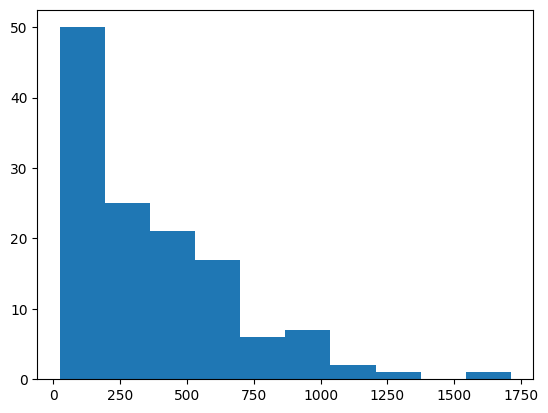

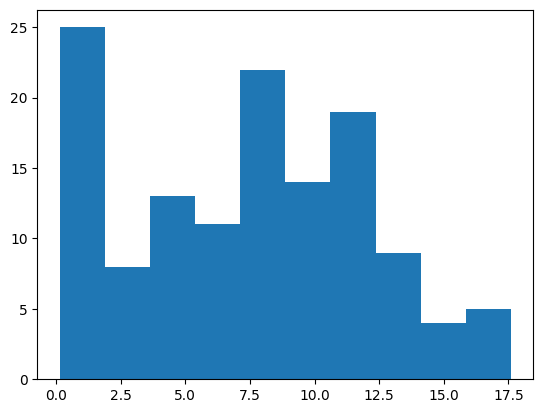

In [9]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
plt.hist(food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'])
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
plt.hist(food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'])
# Show plot
plt.show()

**Finding outliers using IQR**

Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. IQR is also often used to find outliers. 
If a value is less than **Q1 -1.5 x IQR** or greater than **Q3 +1.5 x IQR**, it's considered an outlier. In fact, this is how the lengths of the whiskers in a matplotlib box plot are calculated.

![Diagram of a box plot showing median, quartiles, and outliers](/'datasets/iqr.png')

In this exercise, you'll calculate IQR and use it to find some outliers. `pandas` as `pd` and `numpy` as `np` are loaded and `food_consumption` is available.

STEP 01
Calculate the total co2_emission per country by grouping by country and taking the sum of co2_emission. Store the resulting DataFrame as emissions_by_country.

STEP 02
Compute the first and third quartiles of emissions_by_country and store these as q1 and q3.
Calculate the interquartile range of emissions_by_country and store it as iqr.

STEP 03
Calculate the lower and upper cutoffs for outliers of emissions_by_country, and store these as lower and upper.

STEP 04
Subset emissions_by_country to get countries with a total emission greater than the upper cutoff or a total emission less than the lower cutoff.

In [10]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


In [11]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

In [12]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

In [13]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


## **Random Numbers and Probability (Module 02-041)**

#### **What are the chances?**

Measuring chance
What's the probability of an event?

P (event) = # ways event can happen / total # of possible outcomes

Example: a coin flip
P (heads) = 1 way to get heads / 2 possible outcomes = 1 / 2 = 0.5 = 50% chance of getting heads

Example: a coin 

Example 2: sales people

Sales = [Amir, Brian, Claire, Damian]

P(Brian) = 1 / 4 = 25% change of selecting Brian

1. Sampling from a DataFrame

`print(sales_counts)`

`sales_counts.sample()`

2. Setting a random seed

`np.random.seed(10)`

`sales_counts.sample()`

3. Sampling without replacement

A second meeting happen when Brian was bussy

Sales = [Amir, Claire, Damian]

P(Claire) = 1 / 3 = 33% change of selecting Claire

Sampling twice in Python

`sales_counts.sample(2)`

4. Sampling with replacement

A second meeting happen when Brian was available

Sales = [Amir, Brian, Claire, Damian]

P(Claire) = 1 / 4 = 25% change of selecting Claire

Sampling with/without replacement in Python

`sales_counts.sample(5, replace = True)`

5. Independent events

Two events are independent if the probability of the second event isn't a(ected by the outcome of the first event.

Sampling with replacement = each pick is independent

6. Dependent events

Two events are dependent if the probability of the second event is a(ected by the outcome of the first event.

Sampling without replacement = each pick is dependent


**Calculating probabilities**

You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.

Recall that the probability of an event can be calculated by

P (event) = # ways event can happen / total # of possible outcomes

Both `pandas` as `pd` and `numpy` as `np` are loaded and `amir_deals` is available.

STEP 01
Count the number of deals Amir worked on for each product type and store in counts.

STEP 02
Calculate the probability of selecting a deal for the different product types by dividing the counts by the total number of deals Amir worked on. Save this as probs.


In [14]:
#Load Data
amir_deals = pd.read_csv('datasets/amir_deals.csv')

# Count the deals for each product
counts = amir_deals['product'].value_counts()

# Calculate probability of picking a deal with each product
probs = counts / counts.sum()
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


**Sampling deals**

In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.

Both `pandas` as `pd` and `numpy` as `np` are loaded and `amir_deals` is available.

STEP01
Set the random seed to 24.
Take a sample of 5 deals without replacement and store them as sample_without_replacement.


In [15]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


STEP 02
Take a sample of 5 deals with replacement and save as sample_with_replacement.

In [16]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace = True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
162         163  Product D  Current    Won  6755.66         59
131         132  Product B  Current    Won  6872.29         25
87           88  Product C  Current    Won  3579.63          3
145         146  Product A  Current    Won  4682.94         63
145         146  Product A  Current    Won  4682.94         63


#### **Discrete distributions**



## **More Distributions and the Central Limit Theorem  (Module 03-041)**

## **Correlation and Experimental Design  (Module 04-041)**

# END